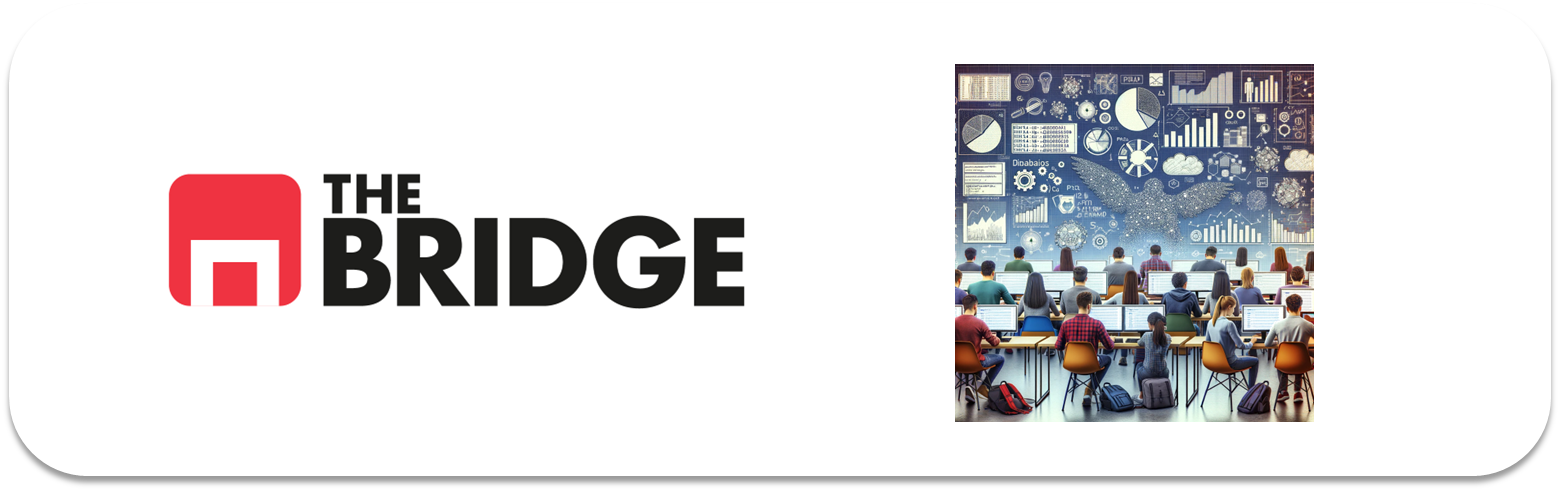

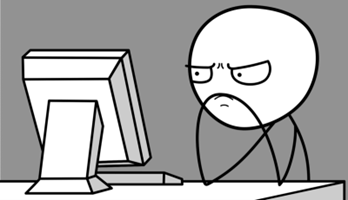

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [5]:
data = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_9/Unidad_2/Workout/data/advertising_ml.csv")

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

Tipo de problema: Este es un problema de clasificación binaria, ya que queremos predecir si un usuario hará clic en un anuncio (variable "Clicked on Ad").
Tipo de aprendizaje: Aprendizaje supervisado, porque tenemos datos etiquetados (la columna objetivo está claramente definida).
Variable target: La variable objetivo es "Clicked on Ad", que toma valores binarios (0 o 1).

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [7]:
# Calcular cardinalidad y clasificar columnas
cardinality = data.nunique()
data_types = data.dtypes

# Clasificar columnas en categóricas y numéricas
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

categorical_info = data[categorical_columns].nunique()
numerical_info = data[numerical_columns].describe()

categorical_info, numerical_info


(Age                83
 Ad Topic Line    1000
 City              969
 Country           237
 Timestamp        1000
 dtype: int64,
        Daily Time Spent on Site   Area Income  Daily Internet Usage  \
 count               1000.000000   1000.000000           1000.000000   
 mean                  65.000200  55000.000080            180.000100   
 std                   15.853615  13414.634022             43.902339   
 min                   32.600000  13996.500000            104.780000   
 25%                   51.360000  47031.802500            138.830000   
 50%                   68.215000  57012.300000            183.130000   
 75%                   78.547500  65470.635000            218.792500   
 max                   91.430000  79484.800000            269.960000   
 
               Male  Clicked on Ad  
 count  1000.000000     1000.00000  
 mean      0.481000        0.50000  
 std       0.499889        0.50025  
 min       0.000000        0.00000  
 25%       0.000000        0.00000 

Categóricas:

Age: 83 valores únicos (convertible a numérica tras limpiar y transformar).

Ad Topic Line: 1000 valores únicos, representa texto descriptivo (categórica).

City: 969 valores únicos, categórica.

Country: 237 valores únicos, categórica.

Timestamp: 1000 valores únicos, representa tiempo (puede derivar datos como día, mes, etc.).


Numéricas:

Daily Time Spent on Site, Area Income, Daily Internet Usage, Male, y Clicked on Ad.

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [8]:
# Limpiar y transformar la columna 'Age' (convertir a numérica)
data['Age'] = data['Age'].str.extract(r'(\d+)').astype(float)

# Verificar duplicados en columnas categóricas de alto cardinalidad
duplicated_rows = data.duplicated().sum()

# Resultado después de la limpieza
cleaned_info = data.info()
duplicated_rows, cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


(np.int64(0), None)

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [12]:
# Dividir en train y test
X = data.drop(columns=['Clicked on Ad'])
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar las dimensiones de cada conjunto
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 9), (200, 9), (800,), (200,))

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

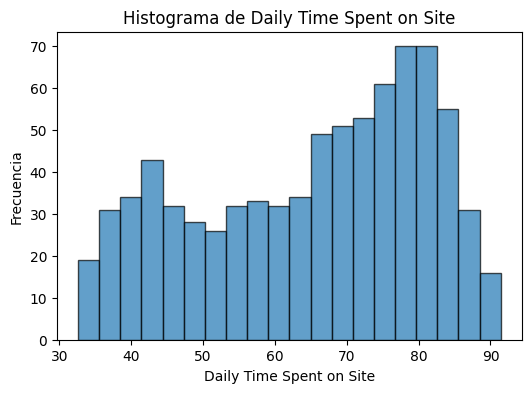

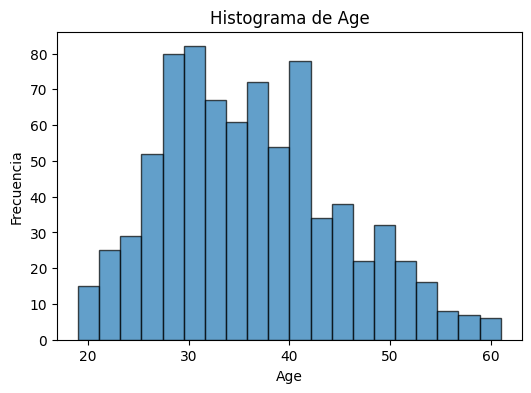

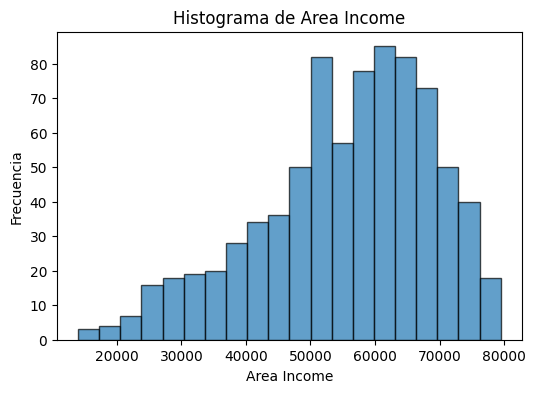

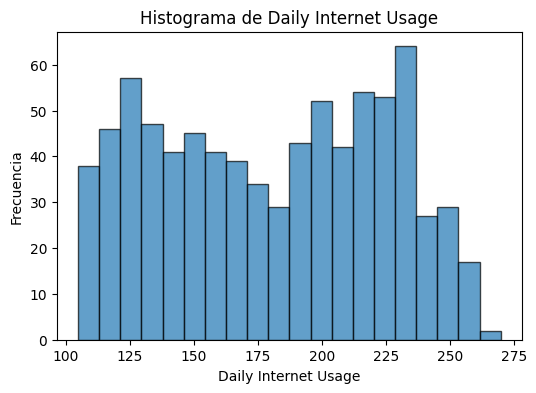

In [13]:
# Columnas numéricas para análisis univariante
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Crear histogramas
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X_train[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

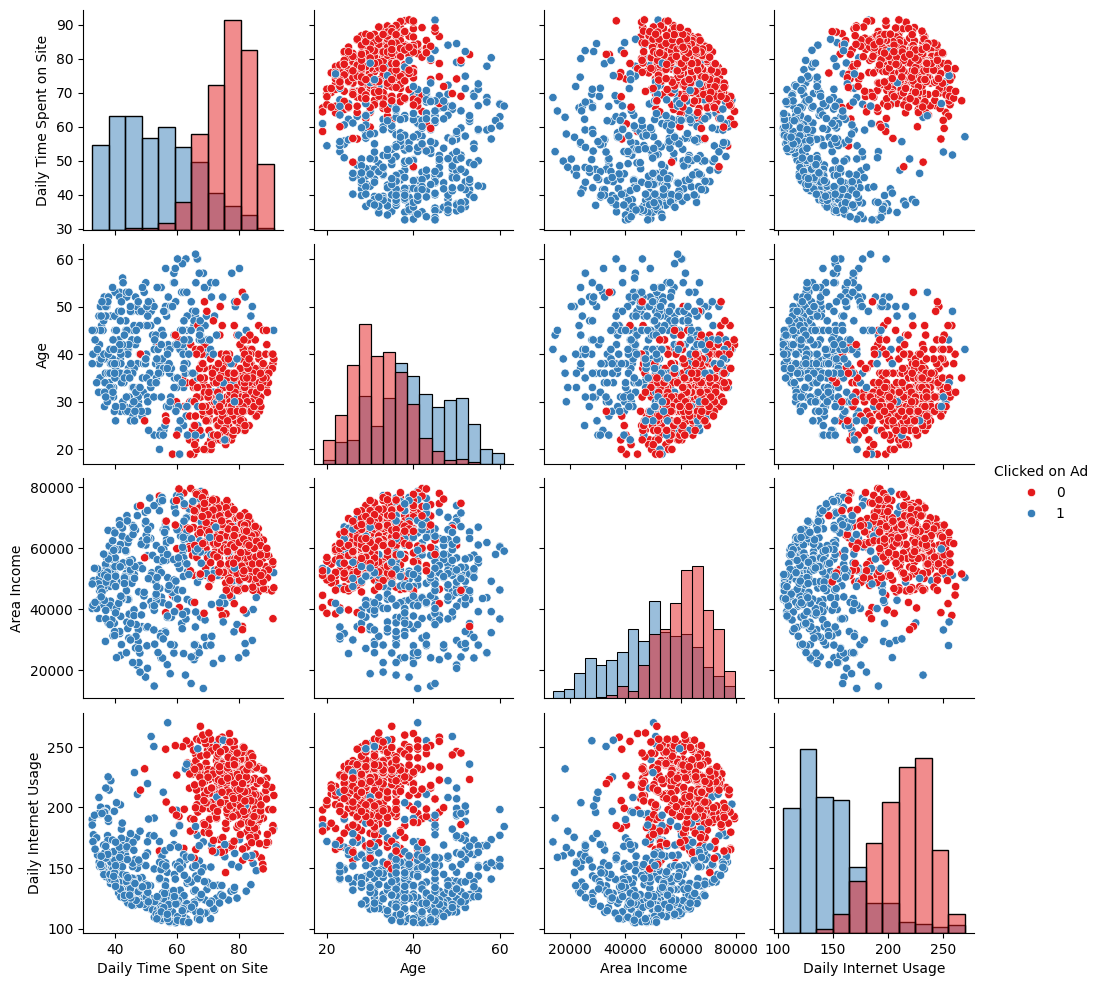

In [14]:
# Añadir la variable target al conjunto de entrenamiento para el PairPlot
train_with_target = X_train.copy()
train_with_target['Clicked on Ad'] = y_train

# Generar el PairPlot
sns.pairplot(train_with_target, vars=numeric_columns, hue='Clicked on Ad', diag_kind='hist', palette='Set1')
plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

### Daily Time Spent on Site:

Tiene una relación notable con la variable objetivo (Clicked on Ad), mostrando diferencias en su distribución para cada clase.
Es una característica informativa para el modelo.

### Age:

Las distribuciones sugieren que la edad también tiene un impacto en el clic en los anuncios.
Es una variable continua clara y diferenciadora.

### Area Income:

Parece haber una relación entre el ingreso promedio y la propensión a hacer clic en anuncios.
Puede ser útil para segmentar a los usuarios.

### Daily Internet Usage:

Esta variable muestra diferencias en los valores promedio entre quienes hacen clic y quienes no.
Es un indicador fuerte del comportamiento del usuario.

### Male:

Aunque binaria, puede ser una variable útil para diferenciar según género.